# Monte Carlo Simulation

## Simulating Asset Returns With Random Walks

* how to generate meaningful, reasonable scenarios for asset returns using a random walk model

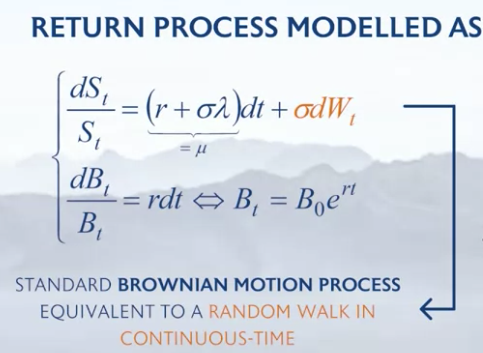

* B: riskfree asset or Bond, a one year bond
* S: risky asset
* $dS_t$ is the change in value of the stock index between time t and times t plus dt which is a time slightly late, in dollar value. Divided by S_t, it becomes a percentage change.
* The second component of the equation ($\sigma d W_t$)is the stockastic process also known as the standard **Brownian Motion Process** -> Equivalent to a random wlak in continuous-time

## Brownian Motion:
* Louis Bachelier 1900
* Used by Einstein
* A stochastic process
* Changes are modelled as  a Gaussian varables, with mean zero and volatility = $\delta_t$ or $dt$
* A fair approximation of the returns on securities

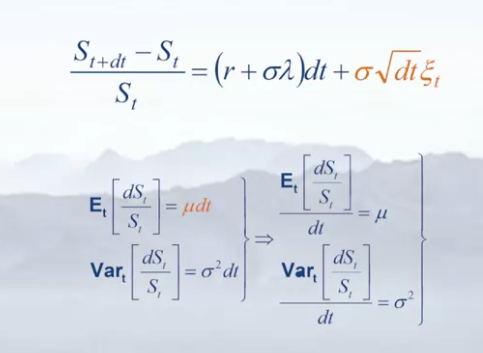

* The size of brownian motion are defined in terms of some kind of random variables psi of t
* Those random variables are mean Z0 and unit variance, they are just like noise. 
* So the way they are being constructed it's very easy to see that the expected return on that stock price is then given by mu times dt so that mu is the annualized expected return.

What is important about this Brownian Motion is the concept of indpendent increments.

* There is no serial correlation. There has no momentum or there's no reversal. This is just a pure random walk.

=> Used as a building blocks for generating scenarios for stock returns

## A Model with A Stochastic Opportunity Set

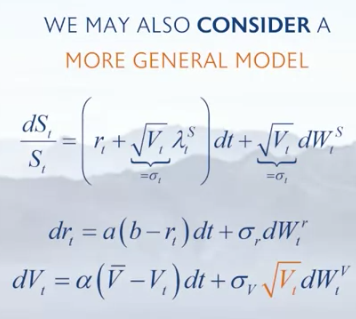

* on average the process will tend to go down back towards the long-term in value. 
* Of course, around these deterministic mean reverting process, then there's uncertainty going around because of sigma r times the change in the Brownian motion value.
* In the same way, we can model variance which is volatility squared again or Sharpe ratio as mean reverting processes themselves. 
* For variance, we need just to be slightly more careful because we want to avoid that variance to become a negative quantity because we know that by construction, variance should be positive.
* That's why we are introducing a slight modification in the process by introducing a square root of variance before the Brownian perturbation
* All of these processes that we introduce are called mean reverting processes, because they reflect the fact that in the real-world, interest rates volatility and Sharpe ratios tend to be positive.

## Wrap-Up

* Assets returns are often assumed to follow a random walk. That is we assume that asset retruns are normally distributed with zero serial correlation and a variance proportional to time
* We can use the brownian motion process to construct more complex asset return models with time-varying parameters

## Lab Session - Random Walk Generation

Recall that the stochastic model for asset returns is given by the Geometric Brownian Motion process:

$$ \frac{S_{t+dt}-S_t}{S_t} = \mu dt + \sigma\sqrt{dt}\xi_t $$

This is the core equation we're going to be working with.  
When we generate simulated returns, we can usually ignore the decomposition of $\mu$ since we only care about the net effective drift term without worrying about what the components of it are.

The implementation is really very close to the equation above, although it can be optimized in many ways, this is the most direct translation of the equation:

```python
import numpy as np

def gbm(n_years = 10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of Geometric Brownian Motion trajectories, such as for Stock Prices
    :param n_years:  The number of years to generate data for
    :param n_paths: The number of scenarios/trajectories
    :param mu: Annualized Drift, e.g. Market Return
    :param sigma: Annualized Volatility
    :param steps_per_year: granularity of the simulation
    :param s_0: initial value
    :return: a numpy array of n_paths columns and n_years*steps_per_year rows
    """
    # Derive per-step Model Parameters from User Specifications
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    # start with just the returns, biased by mu_dt plus 1 since we'll need that later
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    prices = s_0*(1+rets).cumprod()
    return prices
```    

In [1]:
%load_ext autoreload
%autoreload 2
import edhec_risk_kit as erk

In [2]:
import pandas as pd
import numpy as np

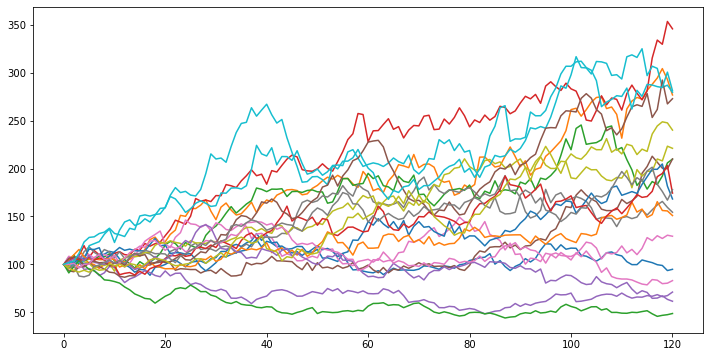

In [7]:
# Random number generation
# 
erk.gbm(n_years=10, n_scenarios=20, mu=0.07).plot(legend=False, figsize=(12,6));